In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm
from sklearn import neighbors
from sklearn import ensemble
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, log_loss
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import lightgbm
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler

In [2]:
train_data_path = "/kaggle/input/playground-series-s3e10/train.csv"
test_data_path = "/kaggle/input/playground-series-s3e10/test.csv"

# Data Understanding

In [3]:
train_df = pd.read_csv(train_data_path)
train_df

id  Mean_Integrated         SD        EK  Skewness  \
0            0       133.171875  59.716081  0.043133 -0.703383   
1            1        87.093750  36.257973  0.435469  2.266057   
2            2       112.640625  39.818393  0.379639  0.922306   
3            3       120.679688  45.918448 -0.098490  0.011775   
4            4       134.070312  57.720107 -0.107772 -0.573335   
...        ...              ...        ...       ...       ...   
117559  117559       132.843750  56.748838 -0.060070 -0.554084   
117560  117560       112.578125  52.539271  0.179580 -0.306961   
117561  117561       119.757812  49.980013  0.064402 -0.270822   
117562  117562       105.789062  46.986595  0.441426  0.372466   
117563  117563       113.515625  50.935956  0.031517 -0.443831   

        Mean_DMSNR_Curve  SD_DMSNR_Curve  EK_DMSNR_Curve  \
0              54.917224       70.084438        0.749798   
1               3.417224       21.865069        7.039330   
2               2.730769       15.689690        8.193471   
3               2.696488       20.954662        8.183874   
4               1.107860       11.255051       16.107748   
...                  ...             ...             ...   
117559          4.054348       27.844144        6.564423   
117560          1.637960       15.331913       11.384718   
117561          3.877926       19.788559        6.959740   
117562          2.097826       17.170612        9.442445   
117563         23.290970       62.006842        2.386364   

        Skewness_DMSNR_Curve  Class  
0                  -0.649512      0  
1                  52.686251      0  
2                  85.649785      0  
3                  70.332899      0  
4                 308.753765      0  
...                      ...    ...  
117559             44.442664      0  
117560            142.535470      0  
117561             56.367789      0  
117562             99.074539      0  
117563              4.001859      0  

[117564 rows x 10 columns]

In [4]:
train_df.describe()

id  Mean_Integrated             SD             EK  \
count  117564.000000    117564.000000  117564.000000  117564.000000   
mean    58781.500000       111.248300      46.713535       0.503498   
std     33937.947861        24.906474       6.102941       1.127093   
min         0.000000         6.054688      24.783273      -1.730782   
25%     29390.750000       104.546875      43.443390       0.049761   
50%     58781.500000       116.664062      47.478932       0.186498   
75%     88172.250000       126.296875      50.862718       0.395620   
max    117563.000000       189.367188      93.602933       7.879628   

            Skewness  Mean_DMSNR_Curve  SD_DMSNR_Curve  EK_DMSNR_Curve  \
count  117564.000000     117564.000000   117564.000000   117564.000000   
mean        1.886385         11.962921       26.190678        8.037488   
std         6.515466         26.719946       20.041937        3.840980   
min        -1.791886          0.213211        7.370432       -2.597872   
25%        -0.188956          2.090301       14.955405        6.742911   
50%         0.091720          2.808528       18.164924        8.442883   
75%         0.691613          4.122910       24.732218       10.003237   
max        65.385974        217.371238      109.890785       34.539844   

       Skewness_DMSNR_Curve          Class  
count         117564.000000  117564.000000  
mean              93.881076       0.093285  
std               79.962110       0.290833  
min               -1.976976       0.000000  
25%               49.409136       0.000000  
50%               83.421375       0.000000  
75%              122.093290       0.000000  
max             1191.000837       1.000000

In [5]:
train_df.isnull().sum()

id                      0
Mean_Integrated         0
SD                      0
EK                      0
Skewness                0
Mean_DMSNR_Curve        0
SD_DMSNR_Curve          0
EK_DMSNR_Curve          0
Skewness_DMSNR_Curve    0
Class                   0
dtype: int64

In [6]:
count_class_zero = (train_df["Class"]==0).sum()
count_class_one = (train_df["Class"]==1).sum()
print(f"The number of Class 0:{count_class_zero}")
print(f"The number of Class 1:{count_class_one}")

The number of Class 0:106597
The number of Class 1:10967


In [7]:
class_zero_df = train_df[train_df["Class"]==0]
class_one_df = train_df[train_df["Class"]==1]

In [8]:
class_zero_df.describe()

id  Mean_Integrated             SD             EK  \
count  106597.000000    106597.000000  106597.000000  106597.000000   
mean    58736.196009       117.549674      47.738898       0.191145   
std     33940.968075        13.982001       5.052667       0.269327   
min         0.000000         6.265625      27.519981      -1.730782   
25%     29348.000000       108.679688      44.566653       0.038144   
50%     58743.000000       118.476562      47.954593       0.161552   
75%     88120.000000       127.421875      51.145908       0.331691   
max    117563.000000       189.367188      93.602933       7.752495   

            Skewness  Mean_DMSNR_Curve  SD_DMSNR_Curve  EK_DMSNR_Curve  \
count  106597.000000     106597.000000   106597.000000   106597.000000   
mean        0.227225          8.163148       22.670474        8.641474   
std         1.041986         22.011597       16.850427        3.450652   
min        -1.791886          0.213211        7.370432       -2.597872   
25%        -0.233214          2.040134       14.783031        7.303059   
50%         0.043904          2.681438       17.624895        8.688011   
75%         0.428411          3.587793       21.955017       10.227543   
max        62.814631        217.371238      109.890785       34.539844   

       Skewness_DMSNR_Curve     Class  
count         106597.000000  106597.0  
mean             102.628848       0.0  
std               78.438611       0.0  
min               -1.976976       0.0  
25%               58.953559       0.0  
50%               88.801546       0.0  
75%              127.653297       0.0  
max             1191.000837       0.0

In [9]:
class_one_df.describe()

id  Mean_Integrated            SD            EK  \
count   10967.000000     10967.000000  10967.000000  10967.000000   
mean    59221.845537        50.000228     36.747219      3.539503   
std     33906.970627        24.746642      6.448527      1.657479   
min        15.000000         6.054688     24.783273     -1.707789   
25%     29854.000000        31.203125     31.541330      2.256867   
50%     59126.000000        46.023438     35.358401      3.645496   
75%     88725.000000        65.664062     40.339397      4.838104   
max    117558.000000       177.335938     75.917640      7.879628   

           Skewness  Mean_DMSNR_Curve  SD_DMSNR_Curve  EK_DMSNR_Curve  \
count  10967.000000      10967.000000    10967.000000    10967.000000   
mean      18.013087         48.895936       60.406346        2.166876   
std       12.557842         37.945237       15.967628        2.099344   
min       -0.980681          0.433110        7.804609       -2.018626   
25%        7.883757         19.163880       50.979812        0.890707   
50%       15.918571         37.221572       63.081075        1.748534   
75%       27.405456         70.024247       71.579496        2.881892   
max       65.385974        200.458194      109.251171       27.461427   

       Skewness_DMSNR_Curve    Class  
count          10967.000000  10967.0  
mean               8.854512      1.0  
std               27.681963      0.0  
min               -1.936212      1.0  
25%               -0.198408      1.0  
50%                1.976720      1.0  
75%                7.700610      1.0  
max              849.382623      1.0

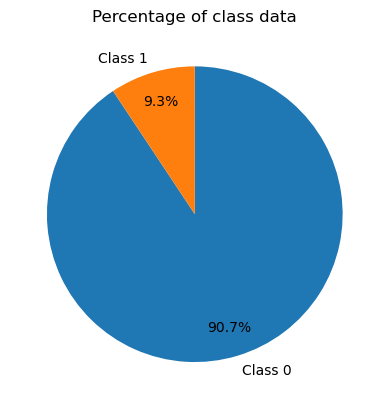

In [10]:
labels = ["Class 0", "Class 1"]
plt.pie([count_class_zero, count_class_one], startangle=90, counterclock=False, autopct='%.1f%%', pctdistance=0.8, labels=labels, labeldistance=1.1)
plt.title("Percentage of class data")

plt.show()

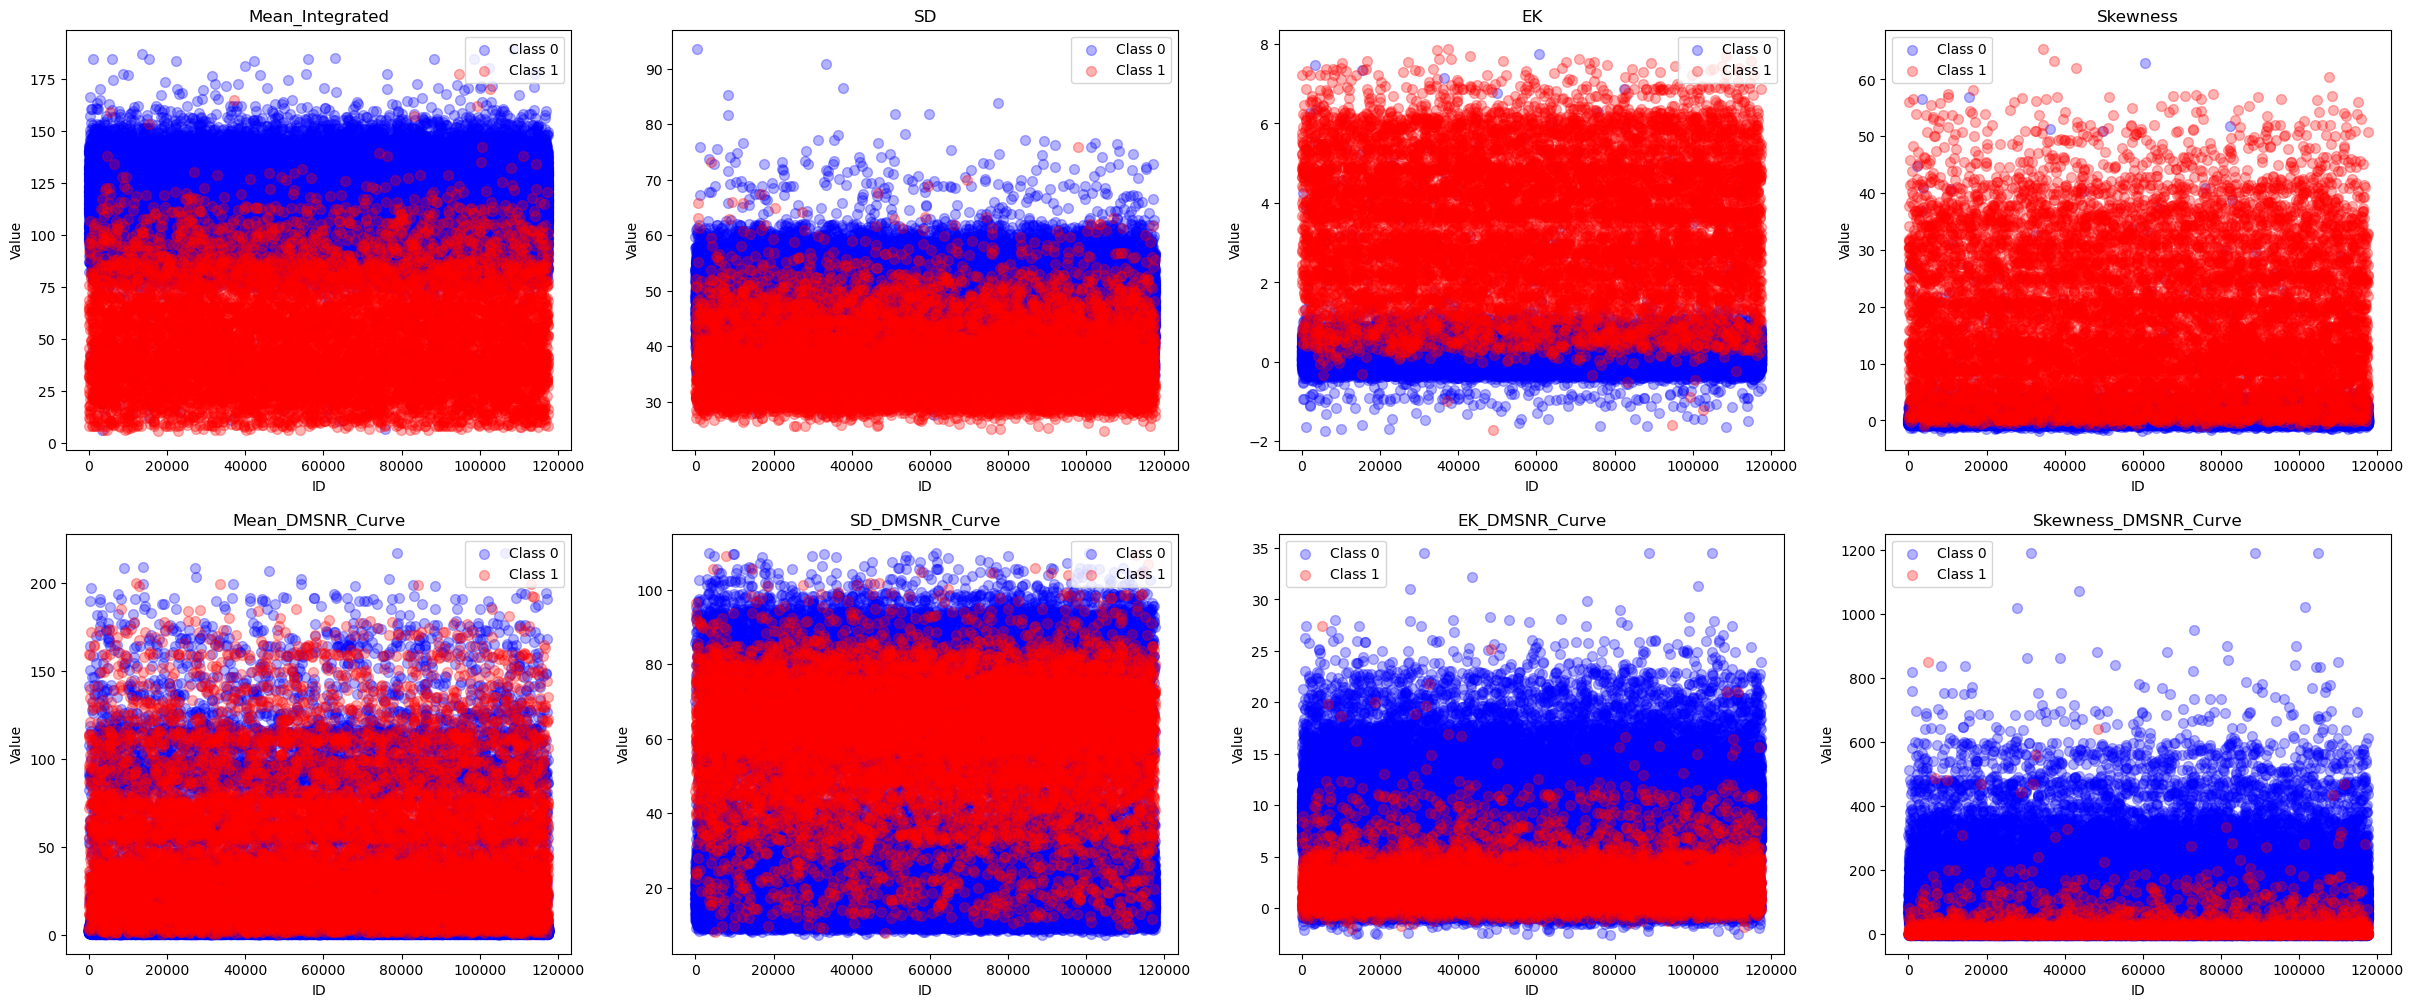

In [11]:
fig = plt.figure(figsize=(30, 12))
i = 0
for col in train_df.columns.values:
    if col == "id" or col == "Class":
        continue
    fig.add_subplot(2,4, i+1)
    plt.scatter(class_zero_df["id"], class_zero_df[col], s=50, c="b", alpha=0.3, label="Class 0")
    plt.scatter(class_one_df["id"], class_one_df[col], s=50, c="r", alpha=0.3, label="Class 1")
    plt.title(f"{col}")
    plt.xlabel("ID")
    plt.ylabel("Value")
    plt.legend()
    i += 1
plt.show()

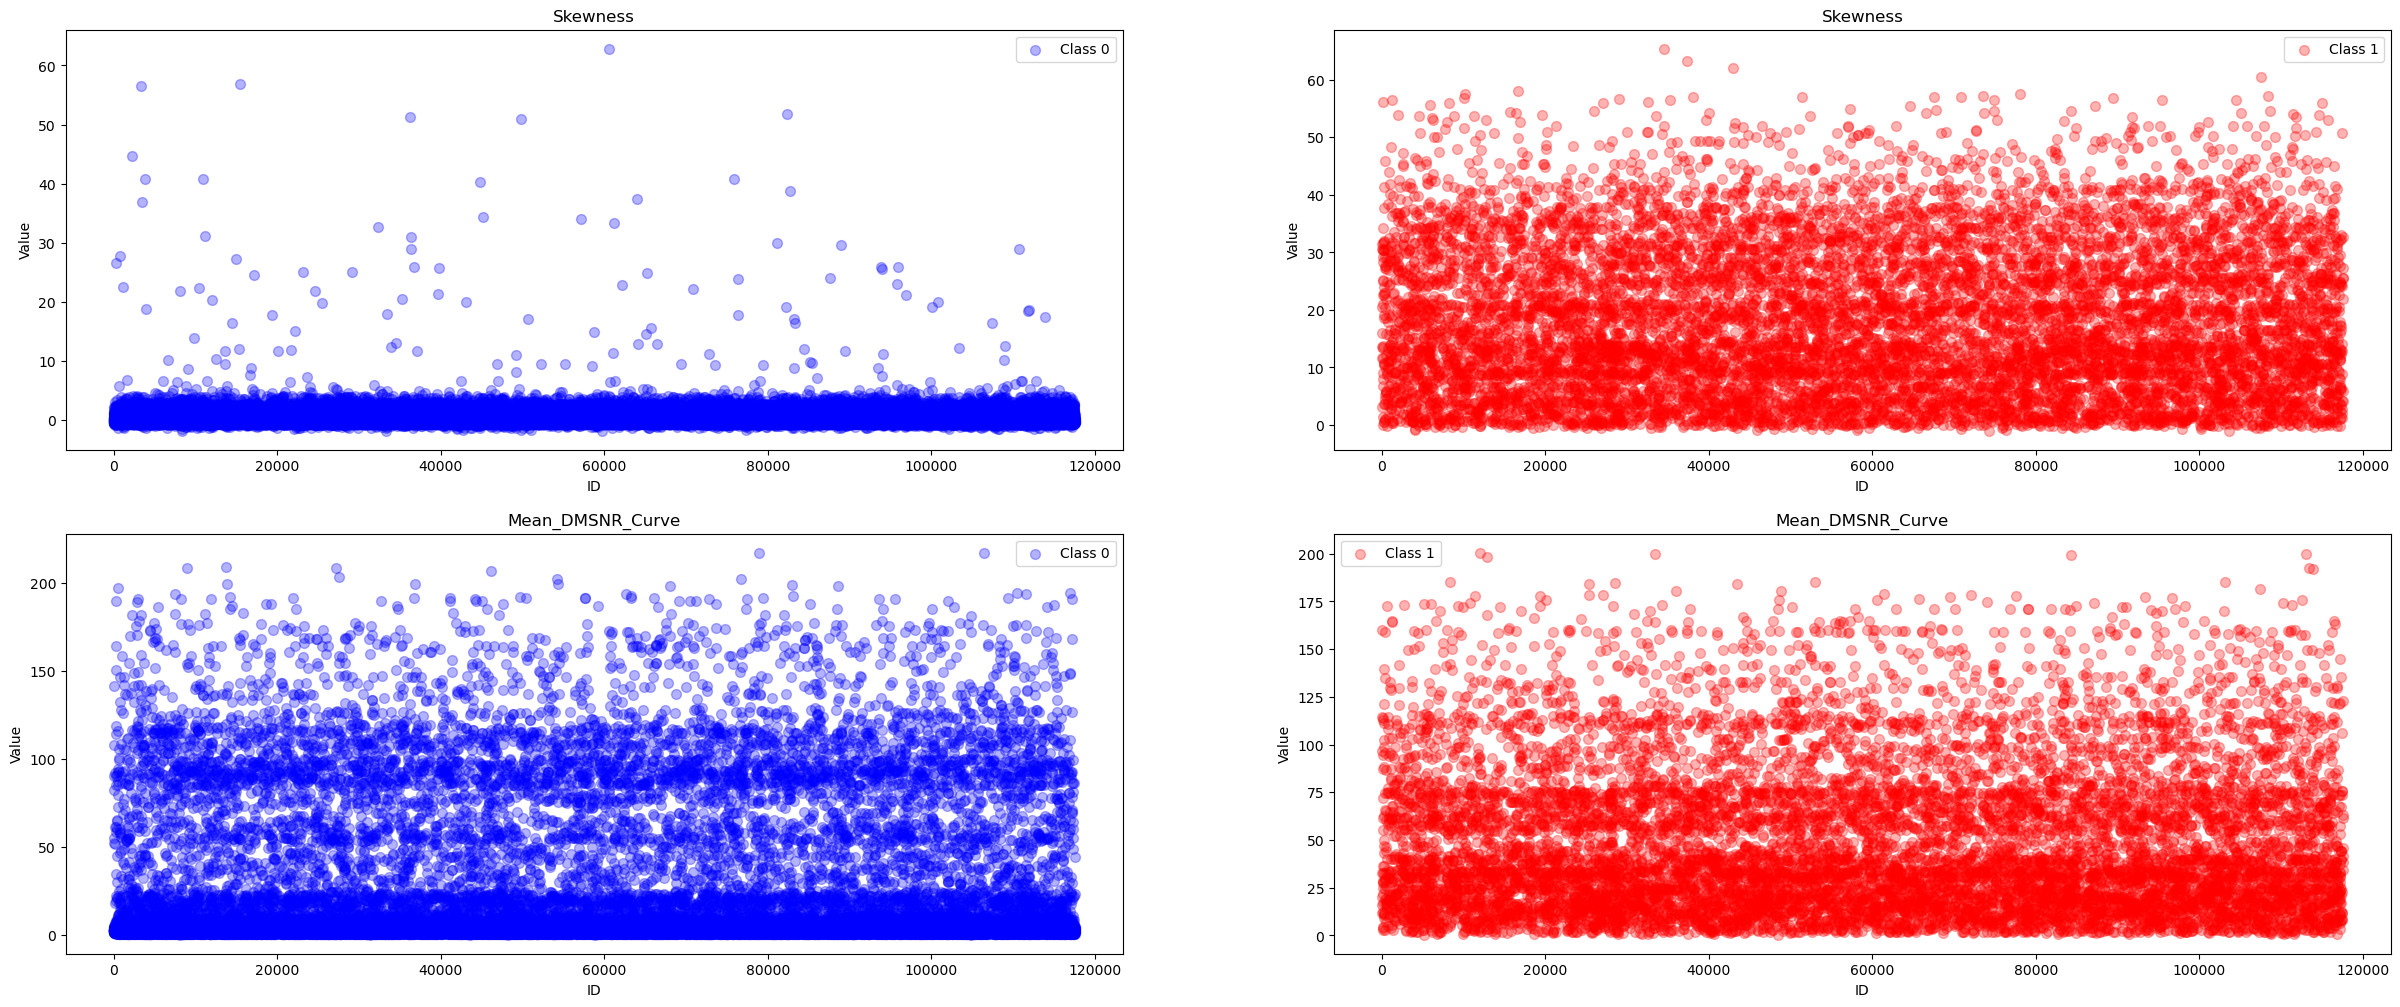

In [12]:
#compare_col = [class_zero_df["Skewness"], class_one_df["Skewness"], class_zero_df["Mean_DMSNR_Curve"], class_one_df["Mean_DMSNR_Curve"]]
fig = plt.figure(figsize=(30, 12))
fig.add_subplot(2,2,1)
plt.scatter(class_zero_df["id"], class_zero_df["Skewness"], s=50, c="b", alpha=0.3, label="Class 0")
plt.title("Skewness")
plt.xlabel("ID")
plt.ylabel("Value")
plt.legend()

fig.add_subplot(2,2,2)
plt.scatter(class_one_df["id"], class_one_df["Skewness"], s=50, c="r", alpha=0.3, label="Class 1")
plt.title("Skewness")
plt.xlabel("ID")
plt.ylabel("Value")
plt.legend()

fig.add_subplot(2,2,3)
plt.scatter(class_zero_df["id"], class_zero_df["Mean_DMSNR_Curve"], s=50, c="b", alpha=0.3, label="Class 0")
plt.title("Mean_DMSNR_Curve")
plt.xlabel("ID")
plt.ylabel("Value")
plt.legend()

fig.add_subplot(2,2,4)
plt.scatter(class_one_df["id"], class_one_df["Mean_DMSNR_Curve"], s=50, c="r", alpha=0.3, label="Class 1")
plt.title("Mean_DMSNR_Curve")
plt.xlabel("ID")
plt.ylabel("Value")
plt.legend()

plt.show()

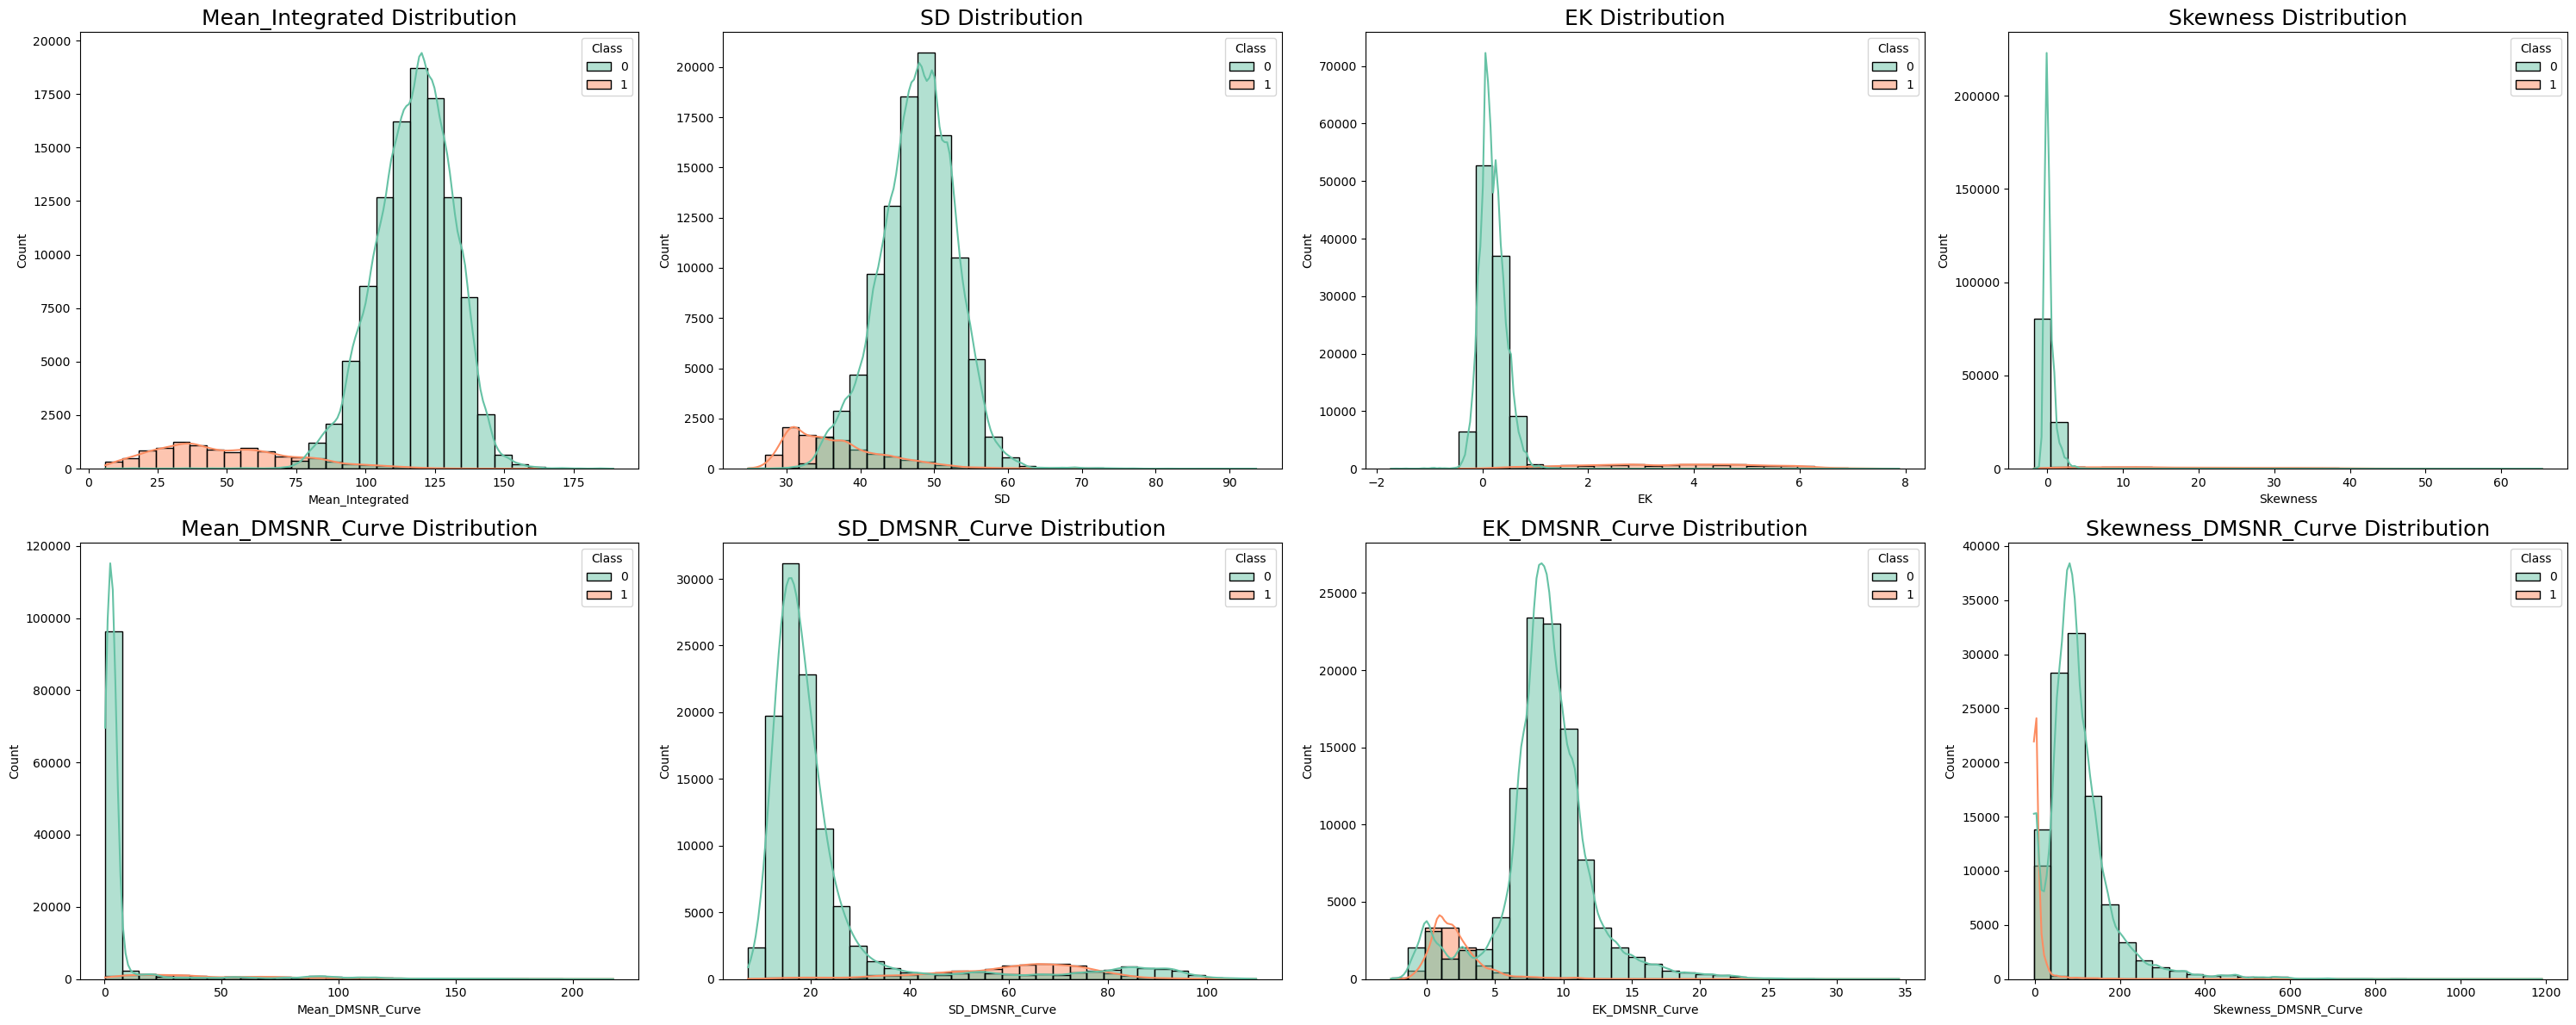

In [13]:
# Hist plotの追加
plt.figure(figsize=(30,12))
idx = 0
for col in train_df.columns.values:
    if col == "id" or col == "Class":
        continue
    plt.subplot(2,4,idx+1)
    sns.histplot(x=col, hue="Class", data=train_df,bins=30,kde=True,palette="Set2")
    plt.title(f"{col} Distribution", fontsize=18)
    plt.tight_layout()
    idx+=1

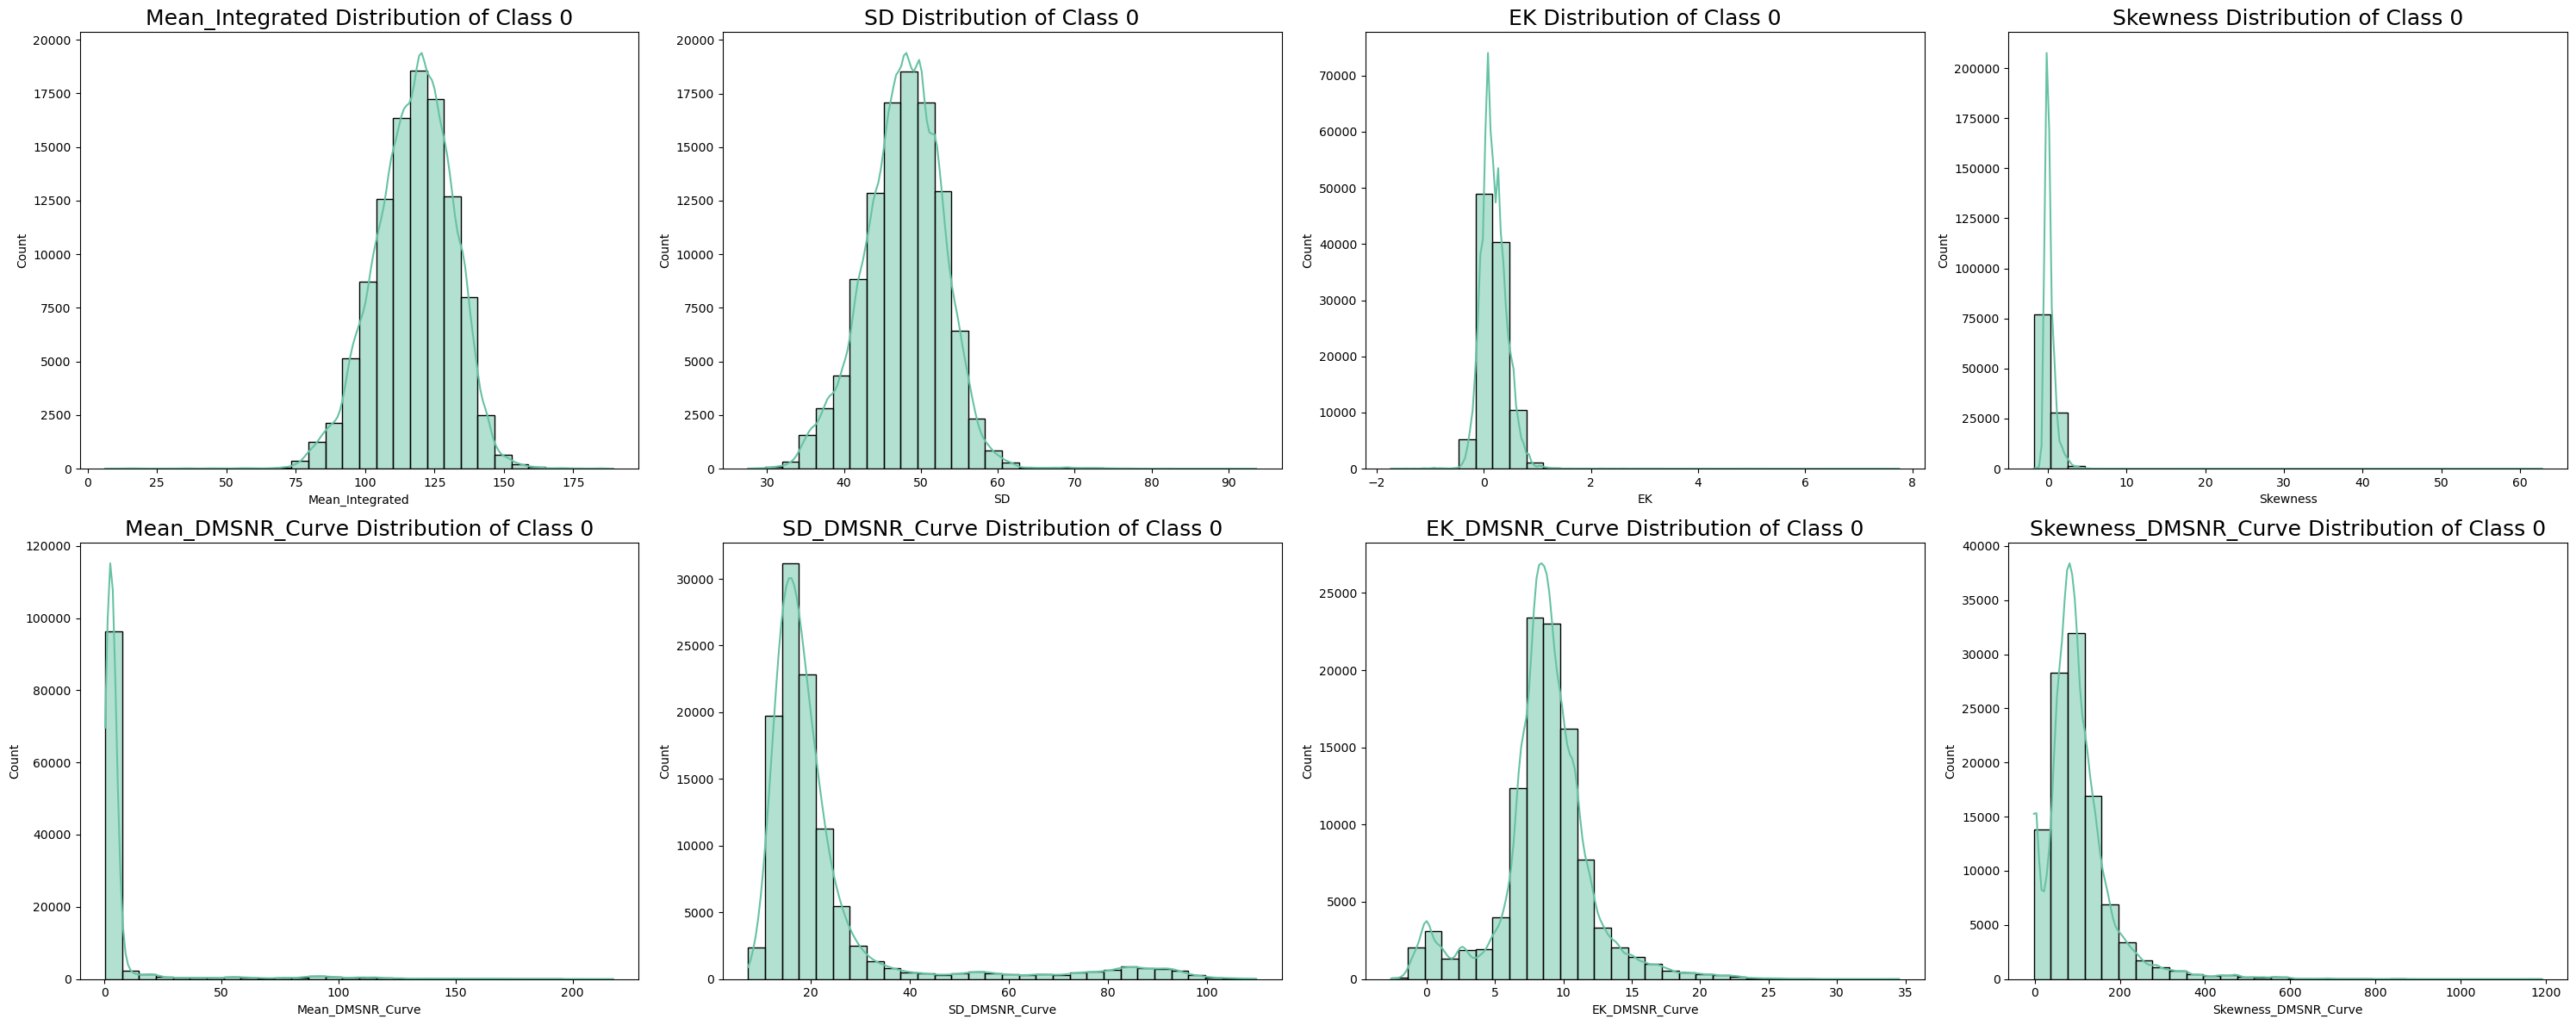

In [14]:
#より詳細な分布がわかるようにClass毎に度数分布出力
plt.figure(figsize=(30,12))
idx = 0
#print("color:", sns.color_palette(palette="Set2"))
for col in train_df.columns.values:
    if col == "id" or col == "Class":
        continue
    plt.subplot(2,4,idx+1)
    sns.histplot(x=col, data=class_zero_df, color = (0.4, 0.7607843137254902, 0.6470588235294118), bins=30,kde=True)
    plt.title(f"{col} Distribution of Class 0", fontsize=18)
    plt.tight_layout()
    idx+=1

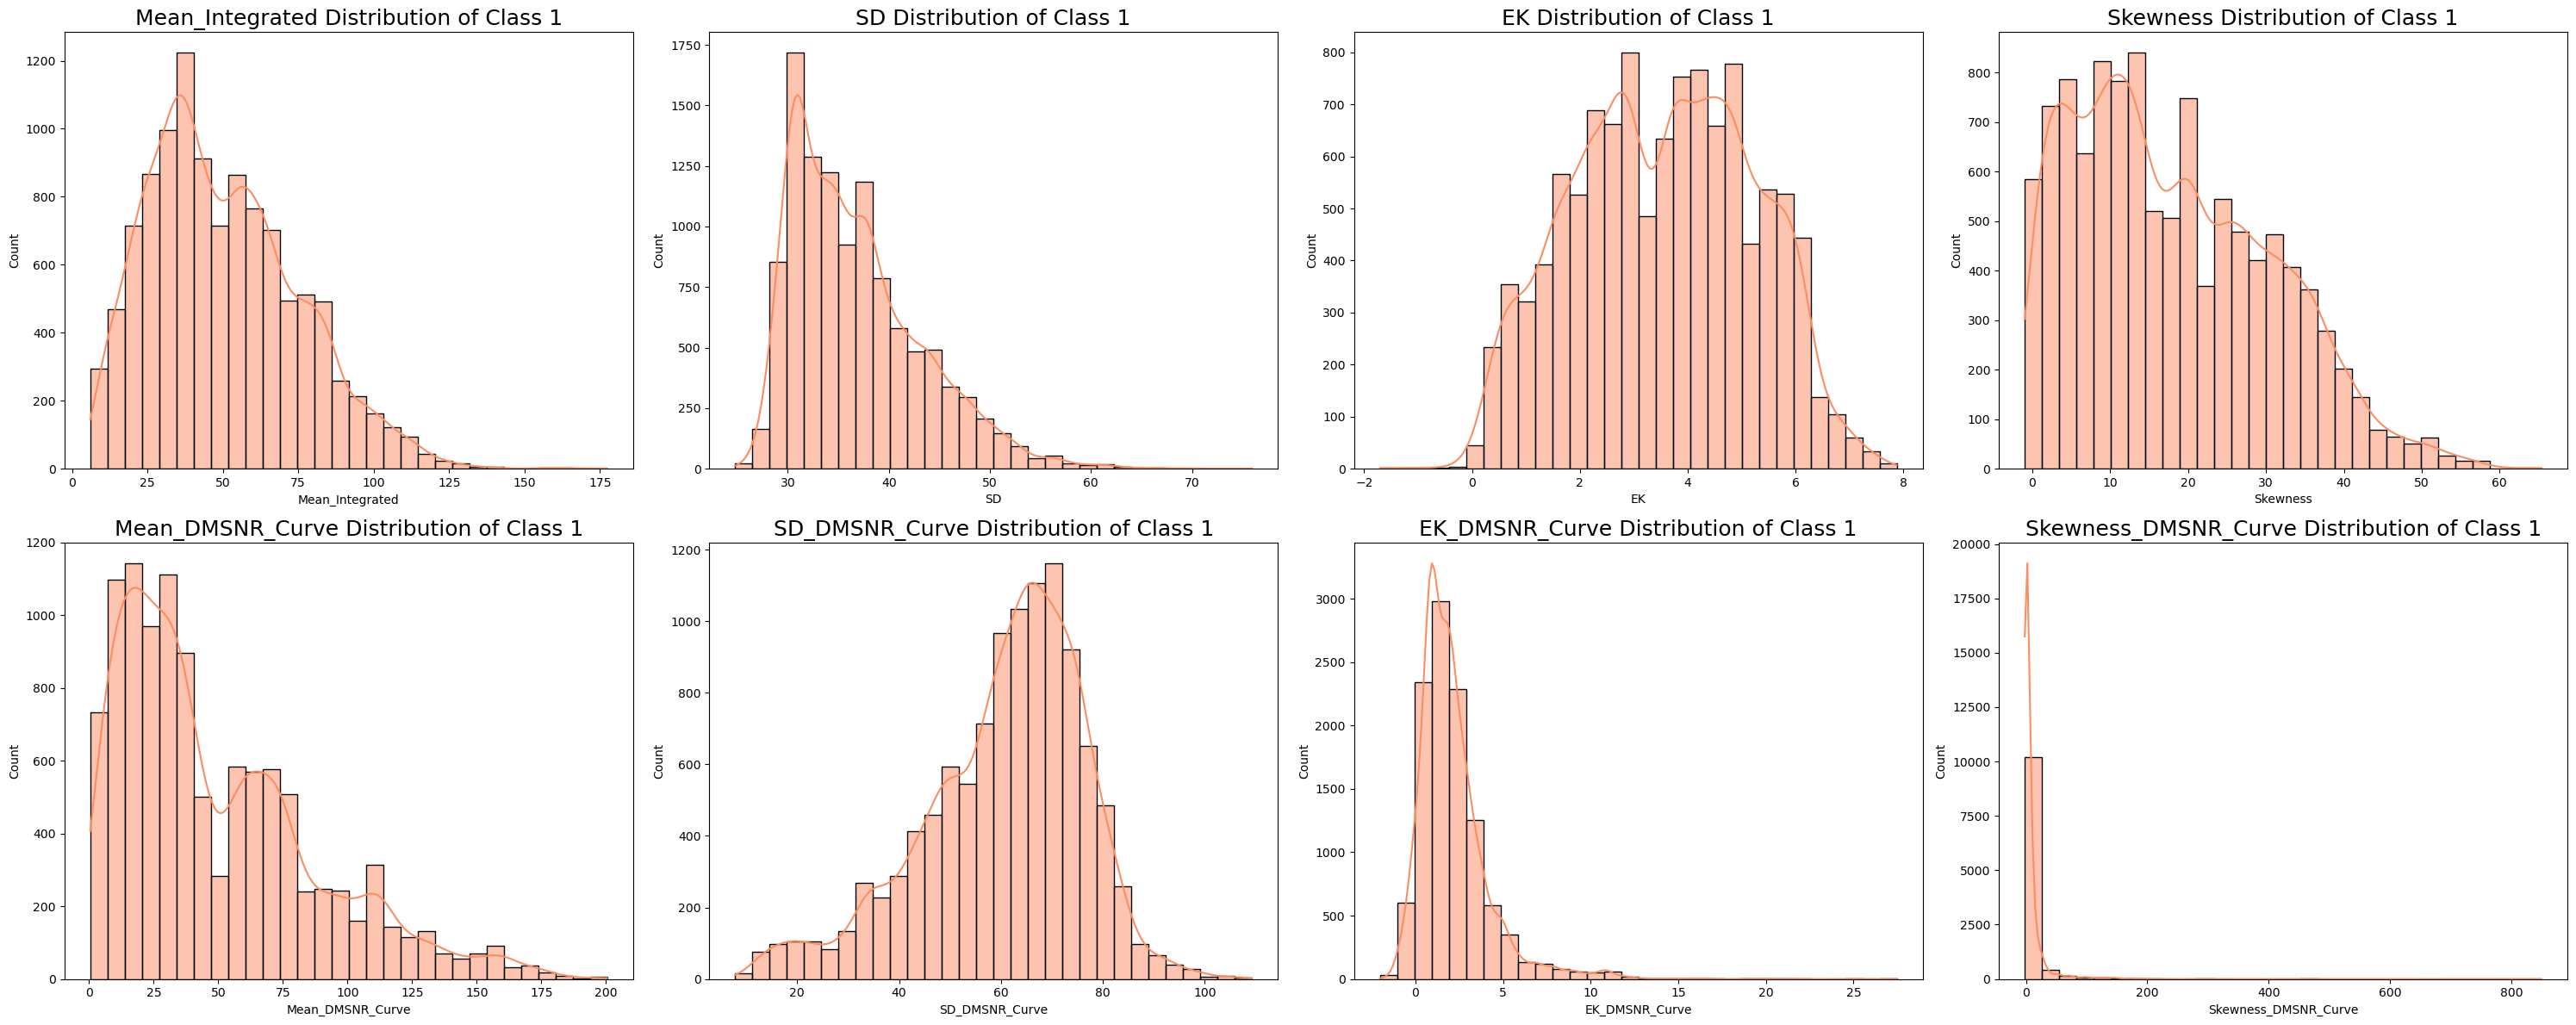

In [15]:
#より詳細な分布がわかるようにClass毎に度数分布出力
plt.figure(figsize=(30,12))
idx = 0
for col in train_df.columns.values:
    if col == "id" or col == "Class":
        continue
    plt.subplot(2,4,idx+1)
    sns.histplot(x=col, data=class_one_df, color = (0.9882352941176471, 0.5529411764705883, 0.3843137254901961), bins=30,kde=True)
    plt.title(f"{col} Distribution of Class 1", fontsize=18)
    plt.tight_layout()
    idx+=1

### Points
- 圧倒的にClass 0のデータが多く、モデルの訓練時にはClass 0とClass 1は同数程度にした方が良さそう。つまり、不均衡データへの対応が必要（参考：https://qiita.com/tk-tatsuro/items/10e9dbb3f2cf030e2119 )
  - アンダーサンプリング（少数派のClass1に合わせる）
  - アンダーバギング（k個の部分集合ごとに学習、アンサンブルする）
  - オーバーサンプリング（少数派のClass1を増やして多数派のClass0に合わせる）。少数派でもデータが1万件程度あるので今回はこちらの手法は必要ないかも？
  - データの不均衡さも重要なファクターと考えてあえてそのままにする
- 外れ値は除去した方が良いかも？
- Mean_DMSNR_Curveは2つのクラスで大差ないため削除しても良いかも？⇒分布を確認してみたらそんなことはなかった…！

## Data Preprocessing

In [16]:
#Class 0とClass 1をほぼ同数にしてシャッフルした訓練用のデータを作成
X_zero = class_zero_df.sample(n=len(class_one_df), random_state=0)
X_zero

id  Mean_Integrated         SD        EK  Skewness  \
36494    36494       147.867188  46.230631 -0.107616  0.092440   
79512    79512       128.265625  45.993975  0.037005  0.141284   
43695    43695       126.664062  42.550083  0.181734  0.367620   
40876    40876       132.031250  52.577769  0.088767 -0.351755   
42746    42746       106.414062  49.857257  0.567676  0.296524   
...        ...              ...        ...       ...       ...   
109363  109363       120.882812  54.258892  0.043148 -0.530730   
4572      4572       125.179688  49.948954  0.192683 -0.068530   
6019      6019       122.828125  52.554579  0.242759 -0.221759   
19389    19389       125.304688  41.966981  0.082493  0.834969   
87928    87928       125.546875  47.192026 -0.147857 -0.173338   

        Mean_DMSNR_Curve  SD_DMSNR_Curve  EK_DMSNR_Curve  \
36494           3.237458       18.166055        7.779947   
79512           4.056856       24.440204        6.818656   
43695           3.780100       21.228145        6.958780   
40876           2.530936       15.679973        8.068227   
42746           2.029264       12.913520       10.420134   
...                  ...             ...             ...   
109363          2.204849       15.227506        9.848741   
4572            3.808528       24.792721        7.091015   
6019            2.877926       16.643422        8.595843   
19389           1.820234       16.749101       10.859507   
87928           3.895485       23.720317        7.037497   

        Skewness_DMSNR_Curve  Class  
36494              70.464167      0  
79512              50.203462      0  
43695              54.834294      0  
40876              86.722799      0  
42746             149.972623      0  
...                      ...    ...  
109363            115.365883      0  
4572               53.566536      0  
6019               92.958178      0  
19389             128.178876      0  
87928              54.069176      0  

[10967 rows x 10 columns]

In [17]:
X = pd.concat([X_zero, class_one_df], axis=0)
X = X.sample(frac=1, random_state=0)
y = X["Class"]
X = X.drop(["id", "Class"], axis=1)
X

Mean_Integrated         SD        EK   Skewness  Mean_DMSNR_Curve  \
28576         99.875000  46.782246  0.437446   0.633962         13.989130   
110055       129.421875  44.923268 -0.065826  -0.056022          4.173077   
23759        109.335938  49.158376  0.294588   0.259006          1.849498   
102574        73.687500  49.176579  2.570964   7.762577         38.415552   
50922         22.734375  36.094263  4.639833  22.944058         48.403846   
...                 ...        ...       ...        ...               ...   
24048         78.796875  38.052716  1.547197   5.640745         12.647993   
93523         90.492188  41.346507  0.542286   1.309664          2.681438   
78360        123.125000  48.817339  0.115856   0.359845          1.945652   
71252        102.351562  42.004731  0.484757   0.918117          2.591973   
18707        134.046875  44.392590  0.066979   0.293365         60.436455   

        SD_DMSNR_Curve  EK_DMSNR_Curve  Skewness_DMSNR_Curve  
28576        46.934347        3.722378             12.877808  
110055       27.041975        7.001552             50.075911  
23759        13.120327       11.241354            164.660998  
102574       60.607723        1.729436              2.364164  
50922        71.383367        1.205215             -0.785508  
...                ...             ...                   ...  
24048        41.525326        3.867539             14.359795  
93523        19.124960        8.923309             87.223655  
78360        15.824457       10.757420            131.926615  
71252        20.848799        8.958145             83.527046  
18707        66.801723        0.850185             -0.964321  

[21934 rows x 8 columns]

In [18]:
# Under sampling + Bagging
X_for_underbagging = pd.concat([class_zero_df, class_one_df], axis=0)
y_for_underbagging = X_for_underbagging["Class"]
X_for_underbagging = X_for_underbagging.drop(["id", "Class"], axis=1)

strategy = {0:len(class_one_df), 1:len(class_one_df)}
rus = RandomUnderSampler(random_state=0, sampling_strategy = strategy)
X_with_underbagging, y_with_underbagging = rus.fit_resample(X_for_underbagging, y_for_underbagging)
y_with_underbagging.value_counts()
#　ここまででUnderSamplingを実施

0    10967
1    10967
Name: Class, dtype: int64

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [20]:
scaler = StandardScaler()

In [21]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
# 比較のためアンダーサンプリングをしない訓練データ、バリデーションデータを作成
X_simple = train_df.copy()
X_simple = X_simple.drop(["id", "Class"], axis=1)
y_simple = train_df["Class"]

X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(X_simple, y_simple, test_size=0.2, random_state=0)

simple_scaler = StandardScaler()

simple_scaler.fit(X_train_simple)

X_train_simple_scaled = simple_scaler.transform(X_train_simple)
X_test_simple_scaled = simple_scaler.transform(X_test_simple)

## Model Selection

In [23]:
class ModelSelection:
    def __init__(self, model_list:list, model_labels_list:list=[], is_predict_proba:bool=False):
        #定義したモデルのインスタンスを格納
        self.model_list = model_list
        
        #モデルの種類のラベルを格納（例："モデル１", "ランダムフォレスト", ...）
        if model_labels_list == []:
            self.model_labels_list = [f"Model {i}" for i in range(model_list)]
        else:
            self.model_labels_list = model_labels_list
        
        #各モデルのスコアのリストを定義
        self.train_accuracy_score_list = []
        self.test_accuracy_score_list = []
        self.precision_score_list = []
        self.recall_score_list = []
        self.f1_score_list = []
        self.log_loss_score_list = []
        
        #確率まで予測するか
        self.is_predict_proba = is_predict_proba
    
    def get_all_model_scores(self, X_train, X_test, y_train, y_test):
        """すべてのモデルのデフォルト値に対するスコアを算出してメンバ変数に格納
        """
        for i, model in enumerate(self.model_list):
            model_label = self.model_labels_list[i]
            self.get_specific_model_scores(model, model_label, X_train, X_test, y_train, y_test)
        
    def get_specific_model_scores(self, model, model_label, X_train, X_test, y_train, y_test):
        try:
            model.fit(X_train, y_train)
            X_train_predict = model.predict(X_train)
            X_test_predict = model.predict(X_test)
            self.train_accuracy_score_list.append(accuracy_score(y_true=y_train, y_pred=X_train_predict))
            self.test_accuracy_score_list.append(accuracy_score(y_true=y_test, y_pred=X_test_predict))
            self.precision_score_list.append(precision_score(y_true=y_test, y_pred=X_test_predict))
            self.recall_score_list.append(recall_score(y_true=y_test, y_pred=X_test_predict))
            self.f1_score_list.append(f1_score(y_true=y_test, y_pred=X_test_predict))
            if self.is_predict_proba:
                test_prob = model.predict_proba(X_test)[:, 1] # 目的変数が1である確率を予測
                self.log_loss_score_list.append(log_loss(y_true=y_test, y_pred=test_prob))
            print(f"model_label:{model_label} succeeded.")
        except Exception as e:
            print(f"Something Error has occured. The error messages are below:")
            print(f"{e}")
            
    def get_summary_results(self):
        result_df = pd.DataFrame({
                    'Model': self.model_labels_list,
                    'Train Accuracy': self.train_accuracy_score_list,
                    'Test Accuracy': self.test_accuracy_score_list,
                    'Test Precision': self.precision_score_list,
                    'Test Recall': self.recall_score_list,
                    'Test F1 Score': self.f1_score_list
        })
        if self.is_predict_proba:
            result_df["Log Loss"] = self.log_loss_score_list
        return result_df

In [24]:
# model selection
model_labels_list = ["SVC", "LinearSVC", "KNeighborsClass", "RandomForestClassifier", "AdaBoostClassifier", "GradientBoostingClassifier", "XGBClassifier", "CatBoostClassifier", "LGBMClassifier", "LogisticRegression"]
model_list = [svm.SVC(max_iter=1000, probability=True), svm.LinearSVC(random_state=0), neighbors.KNeighborsClassifier(), ensemble.RandomForestClassifier(random_state=0), ensemble.AdaBoostClassifier(random_state=0, n_estimators=100), ensemble.GradientBoostingClassifier(random_state=0), XGBClassifier(random_state=0), CatBoostClassifier(silent=True, random_state=0), LGBMClassifier(random_state =0), LogisticRegression(random_state=0)]

In [25]:
# Training and comparing selected models
model_selection = ModelSelection(model_list, model_labels_list)
model_selection.get_all_model_scores(X_train_scaled, X_test_scaled, y_train, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


model_label:SVC succeeded.


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


model_label:LinearSVC succeeded.
model_label:KNeighborsClass succeeded.
model_label:RandomForestClassifier succeeded.
model_label:AdaBoostClassifier succeeded.
model_label:GradientBoostingClassifier succeeded.
model_label:XGBClassifier succeeded.
model_label:CatBoostClassifier succeeded.
model_label:LGBMClassifier succeeded.
model_label:LogisticRegression succeeded.


In [26]:
model_selection_result_df = model_selection.get_summary_results()
model_selection_result_df

Model  Train Accuracy  Test Accuracy  Test Precision  \
0                         SVC        0.974640       0.970823        0.988652   
1                   LinearSVC        0.970593       0.970139        0.992837   
2             KNeighborsClass        0.976463       0.967860        0.979458   
3      RandomForestClassifier        0.999943       0.975838        0.981558   
4          AdaBoostClassifier        0.977660       0.973558        0.979695   
5  GradientBoostingClassifier        0.981136       0.974926        0.981524   
6               XGBClassifier        0.997094       0.977205        0.982941   
7          CatBoostClassifier        0.988887       0.977889        0.983856   
8              LGBMClassifier        0.991281       0.976066        0.981567   
9          LogisticRegression        0.971562       0.970367        0.990965   

   Test Recall  Test F1 Score  
0     0.952620       0.970302  
1     0.947153       0.969457  
2     0.955809       0.967489  
3     0.969932       0.975710  
4     0.967198       0.973407  
5     0.968109       0.974771  
6     0.971298       0.977085  
7     0.971754       0.977768  
8     0.970387       0.975945  
9     0.949431       0.969753

In [27]:
# Log Lossを考慮したModel Selection
# 暫定的に確率を考慮できないモデルを外す
model_prob_list = [model for model in model_list]
del model_prob_list[1]
model_label_prob_list = [model_label for model_label in model_labels_list]
del model_label_prob_list[1]
model_selection_with_prob = ModelSelection(model_prob_list, model_label_prob_list, is_predict_proba=True)
model_selection_with_prob.get_all_model_scores(X_train_scaled, X_test_scaled, y_train, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


model_label:SVC succeeded.
model_label:KNeighborsClass succeeded.
model_label:RandomForestClassifier succeeded.
model_label:AdaBoostClassifier succeeded.
model_label:GradientBoostingClassifier succeeded.
model_label:XGBClassifier succeeded.
model_label:CatBoostClassifier succeeded.
model_label:LGBMClassifier succeeded.
model_label:LogisticRegression succeeded.


In [28]:
model_selection_result_df_with_log_loss = model_selection_with_prob.get_summary_results()
model_selection_result_df_with_log_loss

Model  Train Accuracy  Test Accuracy  Test Precision  \
0                         SVC        0.974640       0.970823        0.988652   
1             KNeighborsClass        0.976463       0.967860        0.979458   
2      RandomForestClassifier        0.999943       0.975838        0.981558   
3          AdaBoostClassifier        0.977660       0.973558        0.979695   
4  GradientBoostingClassifier        0.981136       0.974926        0.981524   
5               XGBClassifier        0.997094       0.977205        0.982941   
6          CatBoostClassifier        0.988887       0.977889        0.983856   
7              LGBMClassifier        0.991281       0.976066        0.981567   
8          LogisticRegression        0.971562       0.970367        0.990965   

   Test Recall  Test F1 Score  Log Loss  
0     0.952620       0.970302  0.084331  
1     0.955809       0.967489  0.394782  
2     0.969932       0.975710  0.104750  
3     0.967198       0.973407  0.653689  
4     0.968109       0.974771  0.069040  
5     0.971298       0.977085  0.076691  
6     0.971754       0.977768  0.066553  
7     0.970387       0.975945  0.069070  
8     0.949431       0.969753  0.083060

In [29]:
#比較のためアンダーサンプリングをしない訓練データ、バリデーションデータを使って学習モデルを比較
model_selection_simple_with_prob = ModelSelection(model_prob_list, model_label_prob_list, is_predict_proba=True)
model_selection_simple_with_prob.get_all_model_scores(X_train_simple_scaled, X_test_simple_scaled, y_train_simple, y_test_simple)

model_selection_result_simple_df_with_log_loss = model_selection_simple_with_prob.get_summary_results()
model_selection_result_simple_df_with_log_loss

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


model_label:SVC succeeded.
model_label:KNeighborsClass succeeded.
model_label:RandomForestClassifier succeeded.
model_label:AdaBoostClassifier succeeded.
model_label:GradientBoostingClassifier succeeded.
model_label:XGBClassifier succeeded.
model_label:CatBoostClassifier succeeded.
model_label:LGBMClassifier succeeded.
model_label:LogisticRegression succeeded.


Model  Train Accuracy  Test Accuracy  Test Precision  \
0                         SVC        0.990059       0.990771        0.958106   
1             KNeighborsClass        0.991388       0.989835        0.967136   
2      RandomForestClassifier        0.999979       0.991239        0.971562   
3          AdaBoostClassifier        0.989952       0.990218        0.965533   
4  GradientBoostingClassifier        0.991643       0.991196        0.969796   
5               XGBClassifier        0.995864       0.991707        0.971270   
6          CatBoostClassifier        0.995194       0.991792        0.970860   
7              LGBMClassifier        0.993004       0.990814        0.962333   
8          LogisticRegression        0.989229       0.989197        0.973167   

   Test Recall  Test F1 Score  Log Loss  
0     0.943921       0.950960  0.073087  
1     0.924181       0.945171  0.183783  
2     0.934948       0.952904  0.068829  
3     0.930013       0.947441  0.655980  
4     0.936294       0.952751  0.031141  
5     0.940332       0.955550  0.031476  
6     0.941678       0.956046  0.029991  
7     0.939883       0.950976  0.048151  
8     0.911171       0.941149  0.038647

### Points
 - 提出したいものとしてはラベル１である「確率」を調べたいので、確率を簡単に算出できるモデルを利用するのがよさそう？
 - あまりモデルごとの正解率には変化がないように見えるが、Log Lossの値には差がある
 - Log Lossの値としては、CatBoostClassifier, LGBMClassifier, XGBClassifierが精度が良い
 - Log Lossの値を見ると、KNeighborsClass, AdaBoostClassifierは外して良さそう

## Model Parameter Tuning
 - GridSearch/RandomSearch
 - Bayesian Optimization

In [30]:
# # LogLossの値が良かったLightGBMをTuning
# lightgbm = LGBMClassifier(random_state = 0)
# param_dist = {"max_depth": [25,50, 75],
#               "learning_rate" : [0.01,0.05,0.1],
#               "num_leaves": [300,900,1200],
#               "n_estimators": [200],
#               "early_stopping_rounds":[10]
#              }
# grid_search_lgbm = GridSearchCV(lightgbm, n_jobs=-1, param_grid=param_dist, cv = 3, scoring="neg_log_loss", verbose=5)

In [31]:
# grid_search_lgbm.fit(X_train_scaled,y_train)

In [32]:
# grid_search_lgbm.best_estimator_

In [33]:
# grid_search_lgbm.best_params_

In [34]:
# grid_search_lgbm.best_score_

In [35]:
# #lightgbm_after_tuning = grid_search_lgbm.best_estimator_
# valid_data= lightgbm.Dataset(X_test_scaled, y_test)
# lightgbm_after_tuning = LGBMClassifier(learning_rate=0.05, max_depth=25, n_estimators=200, num_leaves=900, random_state=0)
# lightgbm_after_tuning.fit(X_train_scaled, y_train, eval_metric="logloss", early_stopping_rounds=10, valid_sets=[valid_data])

In [36]:
# pred_proba_lgb = lightgbm_after_tuning.predict_proba(X_test_scaled)
# log_loss(y_true=y_test, y_pred=pred_proba_lgb)

In [37]:
# 最もLogLossの値が良かったCatBoostをTuning
# そのほかの値をTuningする前に、underfittingやOverfittingを防ぐためにTreeの数を決める
cat_boost_model = CatBoostClassifier(iterations=5000, loss_function="Logloss", use_best_model=True, od_type="IncToDec", od_pval=1e-4, od_wait=20, random_state=0)
cat_boost_model.fit(X_train_scaled, y_train, eval_set=(X_test_scaled, y_test), verbose=50, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.031928
0:	learn: 0.6232518	test: 0.6238439	best: 0.6238439 (0)	total: 7.63ms	remaining: 38.1s
50:	learn: 0.0765192	test: 0.0784640	best: 0.0784640 (50)	total: 355ms	remaining: 34.5s
100:	learn: 0.0667789	test: 0.0696266	best: 0.0696266 (100)	total: 693ms	remaining: 33.6s
150:	learn: 0.0631766	test: 0.0679742	best: 0.0679742 (150)	total: 1.1s	remaining: 35.4s
200:	learn: 0.0603410	test: 0.0671516	best: 0.0671516 (200)	total: 1.45s	remaining: 34.6s
250:	learn: 0.0578920	test: 0.0667646	best: 0.0667618 (249)	total: 1.77s	remaining: 33.5s
300:	learn: 0.0556937	test: 0.0662896	best: 0.0662858 (297)	total: 2.11s	remaining: 32.9s
350:	learn: 0.0537609	test: 0.0659701	best: 0.0659456 (342)	total: 2.44s	remaining: 32.3s
400:	learn: 0.0518745	test: 0.0657480	best: 0.0657480 (400)	total: 2.77s	remaining: 31.7s
450:	learn: 0.0501968	test: 0.0657973	best: 0.0657078 (416)	total: 3.15s	remaining: 31.8s
500:	learn: 0.0485413	test: 0.0656822	best: 0.0656737 (498)	total: 3.48s	rem

In [38]:
cat_boost_model.tree_count_

575

In [39]:
test_prob_cat_boost = cat_boost_model.predict_proba(X_test_scaled)
log_loss(y_true=y_test, y_pred=test_prob_cat_boost)

0.06557568378470685

In [40]:
tuning_cat_boost_model = CatBoostClassifier(iterations=cat_boost_model.tree_count_, loss_function="Logloss", od_type="IncToDec", od_pval=1e-4, od_wait=20, random_state=0) 

In [41]:
tuning_parameters = {
            #"random_state":[0,5,10,15,20],  #学習精度がランダム性によるものか検証するのにゆくゆくは使う
            "depth" : [6, 7, 8, 9, 10],
            "learning_rate" : [0.01, 0.05, 0.1, 0.2, 0.3]
            #"early_stopping_rounds" : [10, 20, 30]
             }

In [42]:
#下記のGridSearchが正常に動いていないようなので一旦コメントアウト
#cat_boost_grid_search_result = tuning_cat_boost_model.grid_search(tuning_parameters, X=X_train_scaled, y=y_train, verbose=False, plot=True)

In [43]:
#cat_boost_grid_search_result["params"]

In [44]:
#tuning_cat_boost_model.get_params()

In [45]:
# test_prob_after_tuned = tuning_cat_boost_model.predict_proba(X_test_scaled)
# log_loss(y_true=y_test, y_pred=test_prob_after_tuned)

In [46]:
# アンダーサンプリングなしのシンプルなデータを使って最もLogLossの値が良かったCatBoostをTuning
# そのほかの値をTuningする前に、underfittingやOverfittingを防ぐためにTreeの数を決める
cat_boost_model_simple = CatBoostClassifier(iterations=5000, loss_function="Logloss", use_best_model=True, od_type="IncToDec", od_pval=1e-4, od_wait=20, random_state=0)
cat_boost_model_simple.fit(X_train_simple_scaled, y_train_simple, eval_set=(X_test_simple_scaled, y_test_simple), verbose=50, plot=True)

test_prob_cat_boost_simple = cat_boost_model_simple.predict_proba(X_test_simple_scaled)
logloss_val = log_loss(y_true=y_test_simple, y_pred=test_prob_cat_boost_simple)
print(f"LogLoss:{logloss_val}")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.048337
0:	learn: 0.5550950	test: 0.5550790	best: 0.5550790 (0)	total: 18.5ms	remaining: 1m 32s
50:	learn: 0.0332422	test: 0.0322192	best: 0.0322192 (50)	total: 830ms	remaining: 1m 20s
100:	learn: 0.0309138	test: 0.0303973	best: 0.0303973 (100)	total: 1.63s	remaining: 1m 18s
150:	learn: 0.0297210	test: 0.0298618	best: 0.0298618 (150)	total: 2.43s	remaining: 1m 17s
200:	learn: 0.0288164	test: 0.0295903	best: 0.0295862 (194)	total: 3.22s	remaining: 1m 16s
250:	learn: 0.0279636	test: 0.0294051	best: 0.0294051 (250)	total: 4s	remaining: 1m 15s
300:	learn: 0.0273162	test: 0.0293583	best: 0.0293428 (278)	total: 4.76s	remaining: 1m 14s
350:	learn: 0.0267206	test: 0.0293239	best: 0.0293053 (345)	total: 5.63s	remaining: 1m 14s
400:	learn: 0.0260766	test: 0.0293043	best: 0.0293024 (357)	total: 6.46s	remaining: 1m 14s
450:	learn: 0.0254753	test: 0.0292729	best: 0.0292674 (446)	total: 7.27s	remaining: 1m 13s
500:	learn: 0.0249046	test: 0.0292226	best: 0.0292224 (499)	total: 8

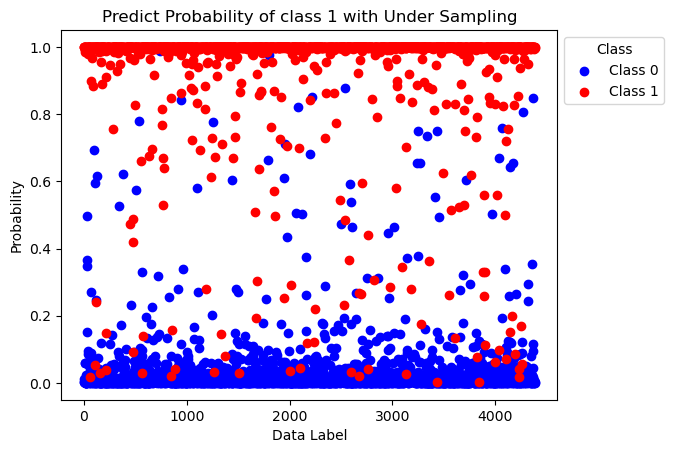

In [47]:
# CatBoostで学習した結果をプロット
fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)

labels = [i for i in y_test]
class_zero = []
class_zero_label = []
class_one = []
class_one_label = []
for i in range(len(test_prob_cat_boost)):
    if labels[i] == 0:
        class_zero.append(test_prob_cat_boost[i, 1])
        class_zero_label.append(i)
    else:
        class_one.append(test_prob_cat_boost[i, 1])
        class_one_label.append(i)

ax.scatter([i for i in class_zero_label], class_zero, c="b", label="Class 0")
ax.scatter([i for i in class_one_label], class_one, c="r", label="Class 1")
ax.set_title('Predict Probability of class 1 with Under Sampling')
ax.set_xlabel('Data Label')
ax.set_ylabel('Probability')
ax.legend(loc='upper left', title="Class", bbox_to_anchor=(1, 1))


plt.show()

In [48]:
print("--------------------Information of Class 0-----------------------------------")
high_prob_list = [i for i in class_zero if i > 0.6]
high_prob_labels = [i for i in range(len(class_zero)) if class_zero[i] > 0.6]
print(f"The number of probabilities over 0.6 in class 0: {len(high_prob_list)}")
print(f"The total number of class 0: {len(class_zero)}")
print(f"The percentage of probabilities over 0.6 in class 0: { len(high_prob_list)/len(class_zero) * 100} %")
print("--------------------Information of Class 1-----------------------------------")
low_prob_list = [i for i in class_one if i < 0.4]
low_prob_labels = [i for i in range(len(class_one)) if class_one[i] < 0.4]
print(f"The number of probabilities under 0.4 in class 1: { len(low_prob_list)}")
print(f"The total number of class 1: {len(class_one)}")
print(f"The percentage of probabilities under 0.4 in class 1: {len(low_prob_list)/len(class_one) * 100} %")

--------------------Information of Class 0-----------------------------------
The number of probabilities over 0.6 in class 0: 29
The total number of class 0: 2192
The percentage of probabilities over 0.6 in class 0: 1.322992700729927 %
--------------------Information of Class 1-----------------------------------
The number of probabilities under 0.4 in class 1: 59
The total number of class 1: 2195
The percentage of probabilities under 0.4 in class 1: 2.6879271070615034 %


In [49]:
len(X_test_scaled[1])

8

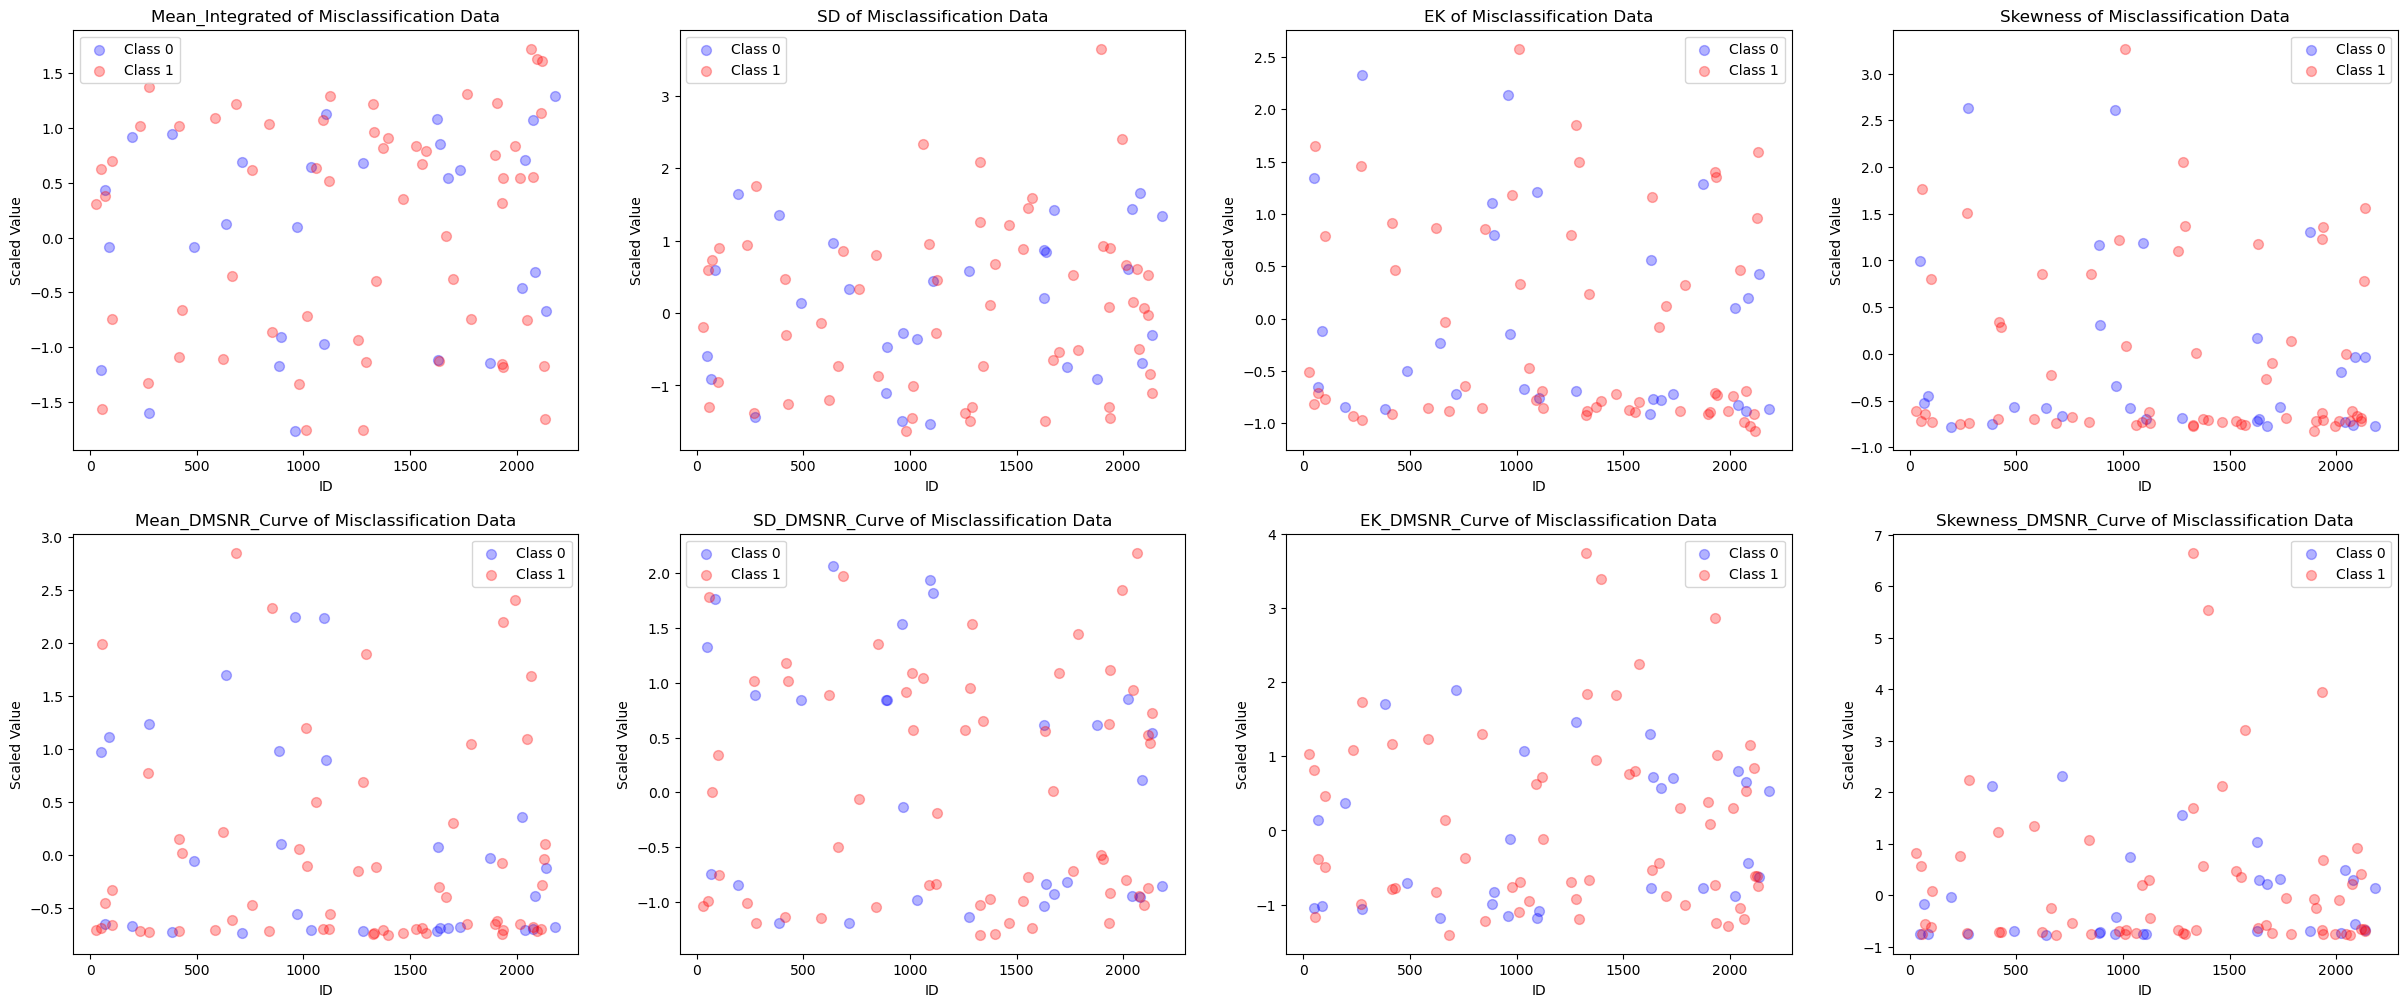

In [50]:
#予測が大きく外れたものをプロット
fig = plt.figure(figsize=(30, 12))
i=0
for col in range(len(X_test_scaled[1])):
    fig.add_subplot(2,4, i+1)
    X_test_scaled_high_prob_value = [X_test_scaled[i][col] for i in high_prob_labels]
    plt.scatter(high_prob_labels, X_test_scaled_high_prob_value, s=50, c="b", alpha=0.3, label="Class 0")
    X_test_scaled_low_prob_value = [X_test_scaled[i][col] for i in low_prob_labels]
    plt.scatter(low_prob_labels, X_test_scaled_low_prob_value, s=50, c="r", alpha=0.3, label="Class 1")
    plt.title(f"{X.columns[col]} of Misclassification Data")
    plt.xlabel("ID")
    plt.ylabel("Scaled Value")
    plt.legend()
    i+=1
    
plt.show()

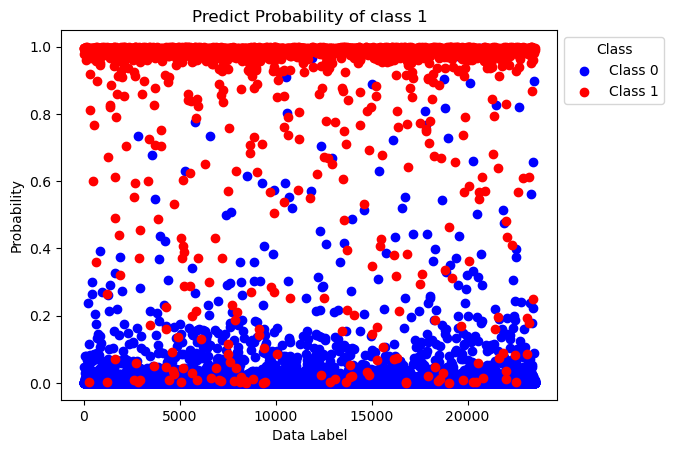

In [51]:
# アンダーサンプリングなしのシンプルなデータを使ってCatBoostで学習した結果をプロット
fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)

labels = [i for i in y_test_simple]
class_zero = []
class_zero_label = []
class_one = []
class_one_label = []
for i in range(len(test_prob_cat_boost_simple)):
    if labels[i] == 0:
        class_zero.append(test_prob_cat_boost_simple[i, 1])
        class_zero_label.append(i)
    else:
        class_one.append(test_prob_cat_boost_simple[i, 1])
        class_one_label.append(i)

ax.scatter([i for i in class_zero_label], class_zero, c="b", label="Class 0")
ax.scatter([i for i in class_one_label], class_one, c="r", label="Class 1")
ax.set_title('Predict Probability of class 1')
ax.set_xlabel('Data Label')
ax.set_ylabel('Probability')

ax.legend(loc='upper left', title="Class", bbox_to_anchor=(1, 1))


plt.show()

In [52]:
print("--------------------Information of Class 0-----------------------------------")
high_prob_list = [i for i in class_zero if i > 0.6]
print(f"The number of probabilities over 0.6 in class 0: {len(high_prob_list)}")
print(f"The total number of class 0:{len(class_zero)}")
print(f"The percentage of probabilities over 0.6 in class 0: {len(high_prob_list)/len(class_zero) * 100} %")
print("--------------------Information of Class 1-----------------------------------")
low_prob_list = [i for i in class_one if i < 0.4]
print(f"The number of probabilities under 0.4 in class 1: {len(low_prob_list)}")
print(f"The total number of class 1: {len(class_one)}")
print(f"The percentage of probabilities under 0.4 in class 1: {len(low_prob_list)/len(class_one) * 100} %")

--------------------Information of Class 0-----------------------------------
The number of probabilities over 0.6 in class 0: 44
The total number of class 0:21284
The percentage of probabilities over 0.6 in class 0: 0.20672805863559482 %
--------------------Information of Class 1-----------------------------------
The number of probabilities under 0.4 in class 1: 119
The total number of class 1: 2229
The percentage of probabilities under 0.4 in class 1: 5.338716913414087 %


## Predict Data for Submission

In [53]:
test_df = pd.read_csv(test_data_path)
submit_id = test_df["id"]
test_df

id  Mean_Integrated         SD        EK  Skewness  \
0      117564       140.046875  54.507800  0.058862 -0.567263   
1      117565       107.828125  51.578965  0.284368 -0.338430   
2      117566       135.062500  49.812343 -0.087784 -0.094341   
3      117567       112.812500  41.926647  0.519921  1.287762   
4      117568        96.210938  35.322620  0.481286  2.443080   
...       ...              ...        ...       ...       ...   
78372  195936       119.328125  46.449223  0.227636  0.161986   
78373  195937       125.835938  43.986678  0.078460  0.077917   
78374  195938       131.789062  43.493074  0.049140  0.402859   
78375  195939        79.476562  42.579993  0.817383  1.818474   
78376  195940        68.265625  39.611800  1.924393  5.348909   

       Mean_DMSNR_Curve  SD_DMSNR_Curve  EK_DMSNR_Curve  Skewness_DMSNR_Curve  
0              2.337793       14.868335        9.591760            117.988781  
1              1.574415       12.501437       11.694968            182.704822  
2              3.576923       21.243336        7.252386             59.021499  
3              6.669732       29.013153        5.097661             27.105240  
4              2.218227       17.041064        9.766006            117.131775  
...                 ...             ...             ...                   ...  
78372          1.120401       13.883072       14.153556            213.485463  
78373          2.342809       13.008583        9.907167            136.815454  
78374          2.116221       14.639555       10.898768            147.929016  
78375          1.903010       15.844982       10.723755            143.273847  
78376         20.903010       55.143702        2.489474              5.413000  

[78377 rows x 9 columns]

In [54]:
test_df = test_df.drop(["id"], axis=1)
test_df_scaled = scaler.transform(test_df)
test_df_scaled

array([[ 1.43194549,  1.5399651 , -0.87979453, ..., -1.06404287,
         0.96430203,  0.8194286 ],
       [ 0.61098088,  1.17237486, -0.76983401, ..., -1.15852496,
         1.44946921,  1.67548545],
       [ 1.30493884,  0.95065076, -0.95130174, ..., -0.80956489,
         0.42465587,  0.03941572],
       ...,
       [ 1.22152851,  0.15753617, -0.88453511, ..., -1.07317533,
         1.26580216,  1.21547482],
       [-0.11144409,  0.04293785, -0.5099268 , ..., -1.02505695,
         1.22543024,  1.15389674],
       [-0.39710952, -0.3295922 ,  0.0298703 , ...,  0.54367351,
        -0.67405119, -0.66971175]])

In [55]:
probabilities_for_class = cat_boost_model.predict_proba(test_df_scaled)
probabilities_for_class

array([[9.99620249e-01, 3.79751142e-04],
       [9.89523633e-01, 1.04763674e-02],
       [9.99284858e-01, 7.15142228e-04],
       ...,
       [9.98852683e-01, 1.14731750e-03],
       [5.70187439e-01, 4.29812561e-01],
       [1.74965237e-03, 9.98250348e-01]])

In [56]:
#Classが1となる確率を算出して提出することに注意！！

probability_df = pd.DataFrame(probabilities_for_class, columns=["Prob of class 0", "Prob of class 1"])
probability_df

Prob of class 0  Prob of class 1
0             0.999620         0.000380
1             0.989524         0.010476
2             0.999285         0.000715
3             0.601129         0.398871
4             0.964559         0.035441
...                ...              ...
78372         0.998927         0.001073
78373         0.999482         0.000518
78374         0.998853         0.001147
78375         0.570187         0.429813
78376         0.001750         0.998250

[78377 rows x 2 columns]

In [57]:
submit_df = pd.concat([submit_id, probability_df["Prob of class 1"]], axis=1)
submit_df = submit_df.rename(columns={'Prob of class 1': 'Class'})
submit_df

id     Class
0      117564  0.000380
1      117565  0.010476
2      117566  0.000715
3      117567  0.398871
4      117568  0.035441
...       ...       ...
78372  195936  0.001073
78373  195937  0.000518
78374  195938  0.001147
78375  195939  0.429813
78376  195940  0.998250

[78377 rows x 2 columns]

In [58]:
submit_df.to_csv("submission.csv", index=False)